In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
imagenet_mean = np.array([104., 117., 124.], dtype=np.float32)
current_dir = os.getcwd()
image_dir = os.path.join(current_dir, 'images/zebra.jpeg')

%matplotlib inline

(-0.5, 499.5, 374.5, -0.5)

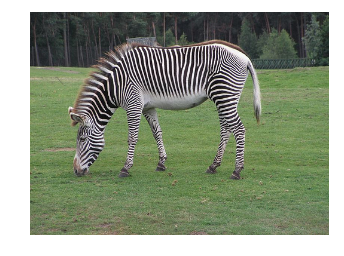

In [4]:
img=cv2.imread(image_dir)
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

In [5]:
from alexnet import AlexNet
x = tf.placeholder(tf.float32, [1, 227, 227, 3])
keep_prob = tf.placeholder(tf.float32)
model = AlexNet(x, keep_prob, 1000, [])


In [6]:
model.conv1

<tf.Tensor 'conv1/conv1:0' shape=(1, 55, 55, 96) dtype=float32>

In [7]:
with tf.Session() as sess:  
     sess.run(tf.global_variables_initializer())
     img = cv2.resize(img.astype(np.float32), (227,227))
     img -= imagenet_mean
     img = img.reshape((1,227,227,3))
    
     features = sess.run(model.conv1, feed_dict={x: img, keep_prob: 1})

In [9]:
print features.shape

(1, 55, 55, 96)


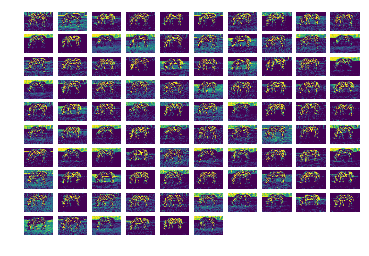

In [15]:
def normalization1(channel_image):       
    
    channel_image -= channel_image.mean()
    channel_image /= channel_image.std()
    channel_image *= 64
    channel_image += 128
    channel_image = np.clip(channel_image, 0, 255).astype('uint8')
    return channel_image
def normalization(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x
features=np.squeeze(features)
for i in range(96):
   plt.subplot(10,10,1+i)

   img=np.squeeze(features[...,i])
   
   img=normalization1(img)
   plt.imshow(img,aspect='auto',cmap='viridis')
   plt.axis('off')
plt.show()

In [16]:
n_features = features.shape[-1]

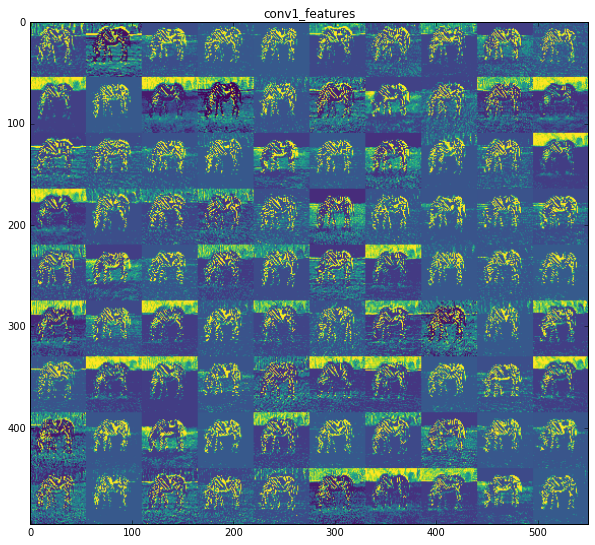

In [27]:
images_per_row = 10
size = features.shape[1]

    # We will tile the activation channels in this matrix
n_cols = n_features // images_per_row
display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
for col in range(n_cols):
    for row in range(images_per_row):
        channel_image = features[:, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
        channel_image -= channel_image.mean()
        channel_image /= channel_image.std()
        channel_image *= 64
        channel_image += 128
        channel_image = np.clip(channel_image, 0, 255).astype('uint8')
        display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
scale = 1. / size
plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
plt.title('conv1_features')
plt.grid(False)
plt.imshow(display_grid, aspect='auto', cmap='viridis')
   
plt.show()